In [15]:
# ! pip install -q -U albumentations

In [17]:
# ! pip install git+https://github.com/mjkvaak/ImageDataAugmentor

  Cloning https://github.com/mjkvaak/ImageDataAugmentor to c:\users\usuario\appdata\local\temp\pip-req-build-6dp__2gu


  Running command git clone -q https://github.com/mjkvaak/ImageDataAugmentor 'C:\Users\Usuario\AppData\Local\Temp\pip-req-build-6dp__2gu'
  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git clone -q https://github.com/mjkvaak/ImageDataAugmentor 'C:\Users\Usuario\AppData\Local\Temp\pip-req-build-6dp__2gu'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


<h1>CLASIFICACIÓN</h1>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import albumentations as A
from ImageDataAugmentor.image_data_augmentor import *

In [43]:
data_model1 = Path('data/model1_data')
data_model2 = Path('data/model2_data')

model1_data_test = data_model1 / 'test'
model1_data_train = data_model1 / 'train'
model1_data_validation = data_model1 / 'validation'

model2_data_test = data_model2 / 'test'
model2_data_train = data_model2 / 'train'
model2_data_validation = data_model2 / 'validation'

# Aumento de datos

In [44]:
transforms = A.Compose([
                        A.Rotate(limit=40, p=0.5),
                        A.RandomBrightnessContrast(p=0.5),
                        A.HorizontalFlip(p=0.5)
                        ])

In [45]:
train_datagen = ImageDataAugmentor(
    augment=transforms,
    seed=123)

In [46]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_dataset = train_datagen.flow_from_directory(
        model1_data_train,
        subset="training",
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=True)

validation_dataset = image_dataset_from_directory(model1_data_validation,
                                                  seed=123,
                                                  image_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE)

Found 600 images belonging to 2 classes.
Found 200 files belonging to 2 classes.


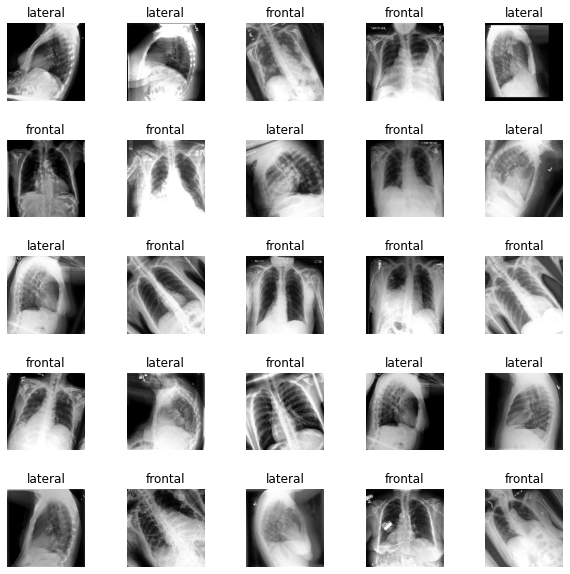

In [47]:
train_dataset.show_data()

In [48]:
IMG_SHAPE = IMG_SIZE + (3,)

def get_model(values):
    input = layers.Input(shape=IMG_SHAPE)

    preprocessing = layers.experimental.preprocessing.Rescaling(1./255)(input)

    x = layers.Conv2D(values[0], 3, padding='same', activation='relu')(preprocessing)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(values[1], 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(values[2], 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(values[3], activation='relu')(x)

    output = layers.Dense(1, 'sigmoid')(x)

    model = Model(inputs=[input], outputs=[output])

    return model

Hacemos 3 modelos con el número de neuronas distintos para ver cual es mejor 

In [49]:
model1 = get_model([16,32,64,128])
model2 = get_model([32,64,128,256])
model3 = get_model([8,16,32,64])

In [50]:
path_models = data_model1 / 'models'
path_exp = path_models / 'exp'

path_models.mkdir(exist_ok=True, parents=True)
path_exp.mkdir(exist_ok=True, parents=True)

In [60]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )        

model_checkpoint1 = tf.keras.callbacks.ModelCheckpoint(
    filepath= path_exp / 'model1.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
    )

model_checkpoint2 = tf.keras.callbacks.ModelCheckpoint(
    filepath= path_exp / 'model2.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
    )

model_checkpoint3 = tf.keras.callbacks.ModelCheckpoint(
    filepath= path_exp / 'model3.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
    )        

history_model1 = model1.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[model_checkpoint1],
    verbose=1
    )

history_model2 = model2.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[model_checkpoint2],
    verbose=1
    )

history_model3 = model3.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[model_checkpoint3],
    verbose=1
    )

np.save(path_exp / 'history_model1.npy', history_model1.history)
np.save(path_exp / 'history_model2.npy', history_model2.history)
np.save(path_exp / 'history_model3.npy', history_model3.history)

Epoch 1/10
19/19 [==============================] - 15s 752ms/step - loss: 0.3107 - accuracy: 0.9059 - val_loss: 0.0520 - val_accuracy: 0.9750

Epoch 00001: val_accuracy improved from -inf to 0.97500, saving model to data/model1_data/models/exp/model1.h5
Epoch 2/10
19/19 [==============================] - 14s 762ms/step - loss: 0.0915 - accuracy: 0.9701 - val_loss: 0.0392 - val_accuracy: 0.9800

Epoch 00002: val_accuracy improved from 0.97500 to 0.98000, saving model to data/model1_data/models/exp/model1.h5
Epoch 3/10
19/19 [==============================] - 14s 734ms/step - loss: 0.0502 - accuracy: 0.9837 - val_loss: 0.0301 - val_accuracy: 0.9900

Epoch 00003: val_accuracy improved from 0.98000 to 0.99000, saving model to data/model1_data/models/exp/model1.h5
Epoch 4/10
19/19 [==============================] - 15s 806ms/step - loss: 0.0257 - accuracy: 0.9980 - val_loss: 0.0421 - val_accuracy: 0.9850

Epoch 00004: val_accuracy did not improve from 0.99000
Epoch 5/10
19/19 [============

In [6]:
history_model1 = np.load(Path('data/model1_data/models/exp/history_model1.npy'), allow_pickle=True)
history_model1 = history_model1.tolist()

history_model2 = np.load(Path('data/model1_data/models/exp/history_model2.npy'), allow_pickle=True)
history_model2 = history_model2.tolist()

history_model3 = np.load(Path('data/model1_data/models/exp/history_model3.npy'), allow_pickle=True)
history_model3 = history_model3.tolist()

# GRAFICAS Y ANALISIS

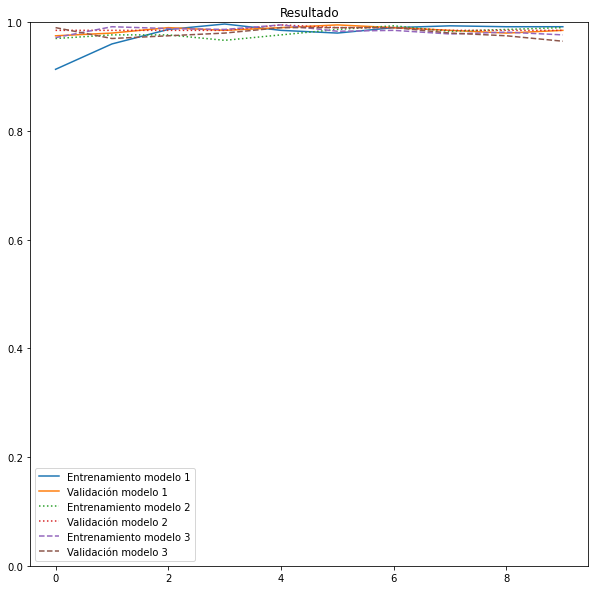

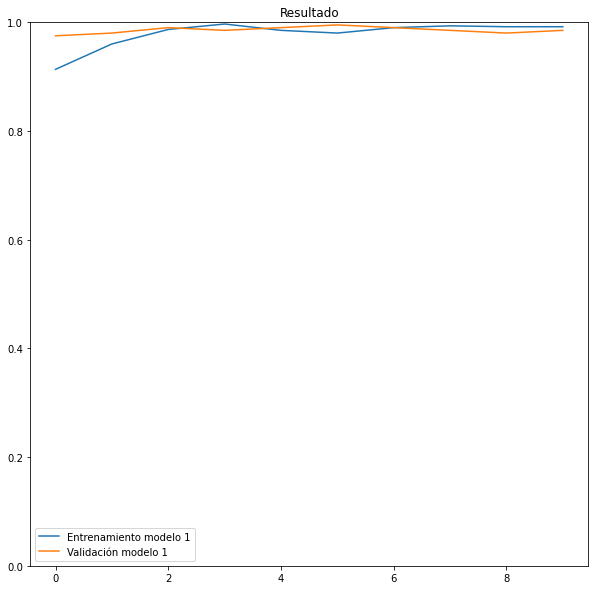

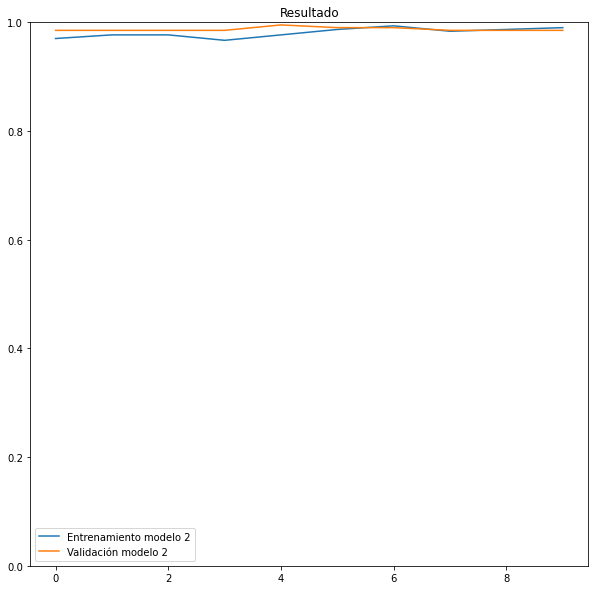

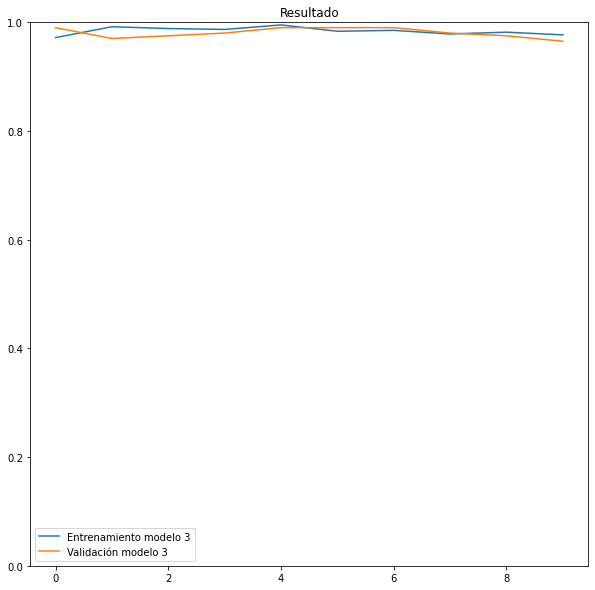

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(history_model1['accuracy'], label='Entrenamiento modelo 1')
plt.plot(history_model1['val_accuracy'], label='Validación modelo 1')
plt.plot(history_model2['accuracy'], label='Entrenamiento modelo 2', linestyle=':')
plt.plot(history_model2['val_accuracy'], label='Validación modelo 2', linestyle=':')
plt.plot(history_model3['accuracy'], label='Entrenamiento modelo 3', linestyle='--')
plt.plot(history_model3['val_accuracy'], label='Validación modelo 3', linestyle='--')
plt.title('Resultado')
plt.ylim([0,1])
plt.legend()

plt.figure(figsize=(10, 10))
plt.plot(history_model1['accuracy'], label='Entrenamiento modelo 1')
plt.plot(history_model1['val_accuracy'], label='Validación modelo 1')
plt.title('Resultado')
plt.ylim([0,1])
plt.legend()

plt.figure(figsize=(10, 10))
plt.plot(history_model2['accuracy'], label='Entrenamiento modelo 2')
plt.plot(history_model2['val_accuracy'], label='Validación modelo 2')
plt.title('Resultado')
plt.ylim([0,1])
plt.legend()

plt.figure(figsize=(10, 10))
plt.plot(history_model3['accuracy'], label='Entrenamiento modelo 3')
plt.plot(history_model3['val_accuracy'], label='Validación modelo 3')
plt.title('Resultado')
plt.ylim([0,1])
plt.legend()

In [13]:
print('Precisión modelo 1:',history_model1['accuracy'][-1])
print('Precisión modelo 2:',history_model2['accuracy'][-1])
print('Precisión modelo 3:',history_model3['accuracy'][-1])

print('\nPrecisión (val) modelo 1:',history_model1['val_accuracy'][-1])
print('Precisión (val) modelo 2:',history_model2['val_accuracy'][-1])
print('Precisión (val) modelo 3:',history_model3['val_accuracy'][-1])

Precisión modelo 1: 0.9916666746139526
Precisión modelo 2: 0.9900000095367432
Precisión modelo 3: 0.9766666889190674

Precisión (val) modelo 1: 0.9850000143051147
Precisión (val) modelo 2: 0.9850000143051147
Precisión (val) modelo 3: 0.9649999737739563


Gracias a las gráficas y sus valores, nos damos cuenta que probablemente el mejor modelo es el primero, debido a que tiene el mayor valor de los tres. Si nos fijamos, en la métrica "val_accuracy", el modelo 1 y 2 tienen los mismos valores, cosa que no es normal. Para solucionarlo, habría que echarle un vistazo y revisar el porqué de esos resultados. Como sea, se he escogido el modelo 1 para realizar la inferencia 